<a href="https://colab.research.google.com/github/aleenalasarin/Machine-Learning-Project/blob/main/mall_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.drop(['CustomerID','Genre'],axis=1,inplace=True)

In [8]:
# there is only input value
x=df
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [9]:
# Elbow point
from sklearn.cluster import KMeans
wcss=[]  #empty list   [var1,var2.....var10] appended variance value
for i in range(1,11):  #i=1,i=2...........i=10
  data=KMeans(n_clusters=i,init='k-means++',random_state=42)
  data.fit(x) #fitting the model
  wcss.append(data.inertia_) #inertia is used to calculate variance

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow Point')

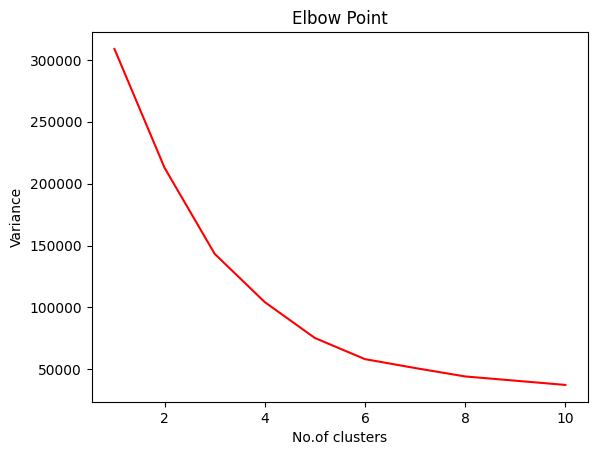

In [10]:
import matplotlib.pyplot as plt
# n_clusters=[1,2,3,4,5,6,7,8,9,10]
# plt.scatter(range(1,11),wcss)
plt.plot(range(1,11),wcss,color='r')
# plt.xlabel("No.of clusters")
# plt.ylabel("Variance")
# plt.title("Elbow points")
plt.xlabel("No.of clusters")
plt.ylabel("Variance")
plt.title("Elbow Point")

In [11]:
from sklearn.cluster import KMeans
data1=KMeans(n_clusters=6,init='k-means++',random_state=42)
data1.fit(x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [12]:

y=data1.predict(x)
y

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 4,
       0, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1], dtype=int32)

In [13]:
# appending output to dataframe
x['cluster']=y
x

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,5
197,32,126,74,1
198,32,137,18,5


In [14]:
# supervised machine learning
# any classification algorithm
# split x and y
x=df.iloc[:,:-1].values
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [15]:
y=df.iloc[:,-1].values
y

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 4,
       0, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1], dtype=int32)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train


array([[ 32,  87,  63],
       [ 27,  60,  50],
       [ 21,  30,  73],
       [ 58,  20,  15],
       [ 21,  33,  81],
       [ 50,  67,  57],
       [ 48,  39,  36],
       [ 36, 103,  85],
       [ 68,  59,  55],
       [ 44,  73,   7],
       [ 33,  42,  60],
       [ 40,  71,  95],
       [ 19,  81,   5],
       [ 24,  38,  92],
       [ 51,  67,  43],
       [ 19,  64,  46],
       [ 45,  28,  32],
       [ 35,  74,  72],
       [ 23,  62,  41],
       [ 19,  63,  54],
       [ 20,  16,   6],
       [ 40,  54,  48],
       [ 50,  40,  55],
       [ 28, 101,  68],
       [ 32, 103,  69],
       [ 48,  54,  46],
       [ 29,  79,  83],
       [ 42,  34,  17],
       [ 34, 103,  23],
       [ 19,  46,  55],
       [ 46,  25,   5],
       [ 32,  75,  93],
       [ 49,  62,  48],
       [ 18,  33,  92],
       [ 35,  19,  99],
       [ 47, 120,  16],
       [ 30,  78,  73],
       [ 35,  18,   6],
       [ 35,  28,  61],
       [ 27,  67,  56],
       [ 31,  17,  40],
       [ 53,  33

In [17]:
x_test

array([[ 24,  60,  52],
       [ 22,  20,  79],
       [ 60,  30,   4],
       [ 34,  78,   1],
       [ 59,  71,  11],
       [ 19,  65,  50],
       [ 32,  48,  47],
       [ 40,  87,  13],
       [ 52,  88,  13],
       [ 24,  39,  65],
       [ 43,  48,  50],
       [ 46,  98,  15],
       [ 36,  85,  75],
       [ 23,  54,  52],
       [ 54, 101,  24],
       [ 27,  88,  69],
       [ 51,  44,  50],
       [ 44,  78,  20],
       [ 67,  54,  41],
       [ 19,  48,  59],
       [ 23,  70,  29],
       [ 35,  21,  35],
       [ 34,  78,  22],
       [ 40,  60,  40],
       [ 18,  48,  59],
       [ 70,  46,  56],
       [ 21,  54,  57],
       [ 68,  48,  48],
       [ 31,  70,  77],
       [ 25,  72,  34],
       [ 30,  19,  72],
       [ 52,  23,  29],
       [ 47,  43,  41],
       [ 26,  54,  54],
       [ 43,  78,  17],
       [ 49,  62,  56],
       [ 29,  73,  88],
       [ 32,  73,  73],
       [ 50,  85,  26],
       [ 45,  54,  53],
       [ 49,  54,  42],
       [ 32, 126

In [18]:
y_train

array([1, 4, 3, 0, 3, 2, 0, 1, 2, 5, 4, 1, 5, 3, 2, 4, 0, 1, 4, 4, 0, 4,
       2, 1, 1, 2, 1, 0, 5, 4, 0, 1, 2, 3, 3, 5, 1, 0, 3, 4, 0, 0, 4, 1,
       2, 5, 0, 2, 4, 5, 5, 0, 5, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 5, 3, 3,
       5, 1, 4, 3, 5, 4, 4, 5, 4, 5, 3, 4, 2, 1, 5, 5, 1, 4, 2, 0, 3, 2,
       4, 2, 5, 1, 2, 0, 3, 2, 1, 1, 3, 2, 1, 5, 1, 1, 2, 2, 2, 2, 5, 4,
       4, 4, 3, 2, 5, 5, 1, 3, 1, 1, 3, 4, 1, 5, 1, 4, 4, 2, 4, 2, 4, 1,
       0, 5, 2, 2, 0, 2, 1, 2], dtype=int32)

In [19]:
y_test

array([4, 3, 0, 5, 5, 4, 4, 5, 5, 3, 2, 5, 1, 4, 5, 1, 2, 5, 2, 4, 4, 0,
       5, 4, 4, 2, 4, 2, 1, 4, 3, 0, 2, 4, 5, 2, 1, 1, 5, 2, 2, 1, 0, 0,
       4, 1, 3, 3, 1, 2, 4, 1, 3, 5, 2, 2, 5, 2, 5, 2], dtype=int32)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.47625237,  0.98322099,  0.4438231 ],
       [-0.83128609, -0.01051573, -0.05203819],
       [-1.25732655, -1.11466765,  0.82525485],
       [ 1.36992295, -1.48271829, -1.38704935],
       [-1.25732655, -1.00425246,  1.13040026],
       [ 0.80186901,  0.24711972,  0.21496404],
       [ 0.65985552, -0.78342208, -0.58604265],
       [-0.1922254 ,  1.57210202,  1.28297297],
       [ 2.07999038, -0.0473208 ,  0.13867769],
       [ 0.37582855,  0.4679501 , -1.69219475],
       [-0.40524563, -0.67300688,  0.32939357],
       [ 0.09180158,  0.39433997,  1.66440472],
       [-1.39934003,  0.76239061, -1.7684811 ],
       [-1.04430632, -0.82022714,  1.5499752 ],
       [ 0.87287575,  0.24711972, -0.31904042],
       [-1.39934003,  0.13670452, -0.20461089],
       [ 0.44683529, -1.18827778, -0.73861536],
       [-0.26323214,  0.50475516,  0.78711168],
       [-1.11531306,  0.0630944 , -0.39532677],
       [-1.39934003,  0.09989946,  0.10053451],
       [-1.32833329, -1.62993855, -1.730

In [21]:
x_test

array([[-1.04430632, -0.01051573,  0.02424816],
       [-1.1863198 , -1.48271829,  1.05411391],
       [ 1.51193644, -1.11466765, -1.80662428],
       [-0.33423888,  0.65197542, -1.92105381],
       [ 1.4409297 ,  0.39433997, -1.53962205],
       [-1.39934003,  0.17350959, -0.05203819],
       [-0.47625237, -0.4521765 , -0.16646772],
       [ 0.09180158,  0.98322099, -1.4633357 ],
       [ 0.94388249,  1.02002606, -1.4633357 ],
       [-1.04430632, -0.78342208,  0.52010945],
       [ 0.3048218 , -0.4521765 , -0.05203819],
       [ 0.51784203,  1.3880767 , -1.38704935],
       [-0.1922254 ,  0.90961087,  0.90154121],
       [-1.11531306, -0.23134612,  0.02424816],
       [ 1.08589598,  1.49849189, -1.04376076],
       [-0.83128609,  1.02002606,  0.67268215],
       [ 0.87287575, -0.59939676, -0.05203819],
       [ 0.37582855,  0.65197542, -1.19633347],
       [ 2.00898364, -0.23134612, -0.39532677],
       [-1.39934003, -0.4521765 ,  0.29125039],
       [-1.11531306,  0.35753491, -0.853

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [23]:
y_pred=model.predict(x_test)
y_pred

array([4, 3, 0, 5, 5, 4, 4, 5, 5, 3, 2, 5, 1, 4, 5, 1, 2, 5, 2, 4, 4, 0,
       5, 4, 4, 2, 4, 2, 1, 4, 3, 0, 2, 4, 5, 2, 1, 1, 5, 2, 2, 1, 0, 0,
       4, 1, 3, 3, 1, 2, 4, 1, 3, 2, 2, 2, 5, 2, 5, 2], dtype=int32)

In [24]:
y_test

array([4, 3, 0, 5, 5, 4, 4, 5, 5, 3, 2, 5, 1, 4, 5, 1, 2, 5, 2, 4, 4, 0,
       5, 4, 4, 2, 4, 2, 1, 4, 3, 0, 2, 4, 5, 2, 1, 1, 5, 2, 2, 1, 0, 0,
       4, 1, 3, 3, 1, 2, 4, 1, 3, 5, 2, 2, 5, 2, 5, 2], dtype=int32)

In [25]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.9833333333333333